# Applied Data Science Capstone

## Introduction: Business Problem

The objective of the project is to find out few safe Community Areas to live with good amenities in the Neighborhoods. The project aims to analyze the Community Areas of Chicago and suggest an appropriate Community Area of Safe living. The project uses ‘K-Means Clustering’, which is an unsupervised Machine Learning technique of Data Science, to segment all 77 community areas of Chicago, IL to prepare five clusters as per neighborhood venue categories.

### Data


Based on the explanation above, below key factors have been considered:

- Number of crimes analysing crime data of 335670 records  accross 77 Cummunity Areas of Chicago
- School Safety Score of 566 schools accross 77 Cummunity Areas of Chicago
- Par Capita Income & Unemployment Rate from the Census data from all 77 77 Cummunity Areas, 

Finally, for segmentation, we have baselined: 
- Common venues categories in the neighbourhoods
- The neighbourhood venues have been API called from foursquare.com


Important Considerations: 
- Data considered for this Capstone Project is for only 2012 fo this Capstone Project
- This is to ensure we are analysing dataset for a common year accross followingh Data Sets

I could get gather only below Data Set for the project:
- The Data Set available for Crime : has data for 2012,2013,2014,2015, 2016, 2017
- The Data Set available for School: has data for 2011 & 2012
- The Data Set available for Census: has data for 2008, 2009, 2010, 2011, 2012



In [6]:
# Load the necessary packages

import pandas as pd 
import numpy as np 
import random 
from numpy.random import randn
from pandas import Series , DataFrame

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image 
from IPython.core.display import HTML 
    
from pandas.io.json import json_normalize

import folium

print('Folium installed')

Folium installed


#### Custom function below: 'check_null_missing' will be used to as part of Data Cleaning step for the Project

In [8]:
def check_null_missing(dfname):
    lst=list(dfname.columns)
    nullcheck=dfname.isnull().values.any()
    if nullcheck == True:
        print('There are null values')
    else:
        print('No Null Values')
    for ax in lst:
        ze=len(dfname[dfname[ax]==0])
        ze1=len(dfname[dfname[ax]== '#'])
        ze2=len(dfname[dfname[ax]=='@'])
        ze3=len(dfname[dfname[ax]=='NaN'])
        ze4=len(dfname[dfname[ax] == " "])
        ze5=len(dfname[dfname[ax].isnull()])
    
                                                                                                                                                                                                                                                                                                
        if ze > 0:
            print('No of Zeros in attribute',ax,'is:', ze)
             
        if ze1 > 0:
            print('No of # in attribute',ax,'is:', ze1)
       
        if ze2 > 0:
             print('No of @ in attribute',ax,'is:', ze2)
        if ze3 > 0:
             print('Not a number in attribute',ax,'is:', ze3)
        if ze4 > 0:
              print('No of blank in attribute',ax,'is:', ze4)
        if ze5 > 0:
              print('No of null in attribute',ax,'is:', ze5)



## Project SECTION:  A

### - Importing Datasets
### - Cleaning the Data

#### We will use  'check_null_missing' (custome) function throughout this project to check for null values

In [4]:
crime_df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [5]:
crime_df["Year"].value_counts()

2012    335670
2013    306703
2014    274527
2016    265462
2015    262995
2017     11357
Name: Year, dtype: int64

In [9]:
# Check Arrest column

crime_df["Arrest"].value_counts()

False    1079242
True      377472
Name: Arrest, dtype: int64

For our Project, we will consider the Crime Data, where the Arrest = True.
This is to ensure that we are not conidering the crime record, where no arrest was made  

In [10]:
crime_df.drop(crime_df.index[crime_df['Arrest'] == False], inplace = True)
crime_df = crime_df.reset_index(drop=True)
crime_df["Arrest"].value_counts()

True    377472
Name: Arrest, dtype: int64

- This is to ensure we are analysing dataset for a common year accross followingh Data Sets
- Data considered for this Capstone Project is for only 2012 fo this Capstone Project


In [11]:
crime_df["Year"].value_counts() # after considering rows, with Arrest = True

2012    90511
2013    86219
2014    79057
2015    69397
2016    50386
2017     1902
Name: Year, dtype: int64

In [12]:
# We will consider the Crime Data set for only Year 2012, as 
# Drop all rows, where, Year is not equal to 2012

crime_df.drop(crime_df.index[crime_df['Year'] != 2012], inplace = True)
crime_df = crime_df.reset_index(drop=True)
crime_df["Year"].value_counts()

2012    90511
Name: Year, dtype: int64

In [13]:
print("Shape of crime_ID : ", crime_df.shape)
print("unique Crime ID   : ", crime_df['ID'].nunique())
print("unique Crime Case Number : ", crime_df['Case Number'].nunique())

Shape of crime_ID :  (90511, 23)
unique Crime ID   :  90511
unique Crime Case Number :  90498


In [14]:
crime_df["Primary Type"].value_counts()

NARCOTICS                           35223
BATTERY                             13058
THEFT                                8244
CRIMINAL TRESPASS                    6055
ASSAULT                              4792
WEAPONS VIOLATION                    3263
DECEPTIVE PRACTICE                   2968
OTHER OFFENSE                        2755
CRIMINAL DAMAGE                      2462
PUBLIC PEACE VIOLATION               2250
PROSTITUTION                         2188
ROBBERY                              1382
BURGLARY                             1277
INTERFERENCE WITH PUBLIC OFFICER     1162
MOTOR VEHICLE THEFT                   868
GAMBLING                              723
LIQUOR LAW VIOLATION                  562
OFFENSE INVOLVING CHILDREN            398
SEX OFFENSE                           289
HOMICIDE                              207
CRIM SEXUAL ASSAULT                   200
ARSON                                  46
STALKING                               38
INTIMIDATION                      

To check: The Crime dataset, should have records pertaining to Crimes, whcih must be considered for our Analysis.

In [15]:
crime_df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

Drop all unnecessary Cols. We need below:

In [16]:
crime_df.drop(columns=['Unnamed: 0', 'Case Number', 'Date', 'Block', 'IUCR', 'Description', 'Arrest', 'Location Description',
       'Domestic', 'Beat', 'District', 'Ward', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'], inplace = True)

crime_df = crime_df.reset_index(drop=True)

In [46]:
print("Shape of crime_ID data : ", crime_df.shape)
print("Unique Community_Area  : ", crime_df['Community Area'].nunique())
print()

Shape of crime_ID data :  (90511, 3)
Unique Community_Area  :  78



In [17]:
# Fix the Column Names.
crime_df.rename(columns={"ID" : "Crime_ID" , "Primary Type": "Primary_Type", "Community Area": "COMMUNITY_AREA_NUMBER"}, inplace = True)

crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90511 entries, 0 to 90510
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime_ID               90511 non-null  int64  
 1   Primary_Type           90511 non-null  object 
 2   COMMUNITY_AREA_NUMBER  90505 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


Seems there are missing values in Community Area column.

In [18]:
crime_df = crime_df.reset_index(drop=True)
check_null_missing(crime_df)

There are null values
No of Zeros in attribute COMMUNITY_AREA_NUMBER is: 3
No of null in attribute COMMUNITY_AREA_NUMBER is: 6


In [19]:
crime_df.dropna(inplace=True)
check_null_missing(crime_df)

No Null Values
No of Zeros in attribute COMMUNITY_AREA_NUMBER is: 3


In [22]:
crime_df.drop(crime_df.index[crime_df['COMMUNITY_AREA_NUMBER'] == "NaN"], inplace = True)
crime_df = crime_df.reset_index(drop=True)
check_null_missing(crime_df)

No Null Values
No of Zeros in attribute COMMUNITY_AREA_NUMBER is: 3


In [23]:
crime_df.drop(crime_df.index[crime_df['COMMUNITY_AREA_NUMBER'] == 0], inplace = True)
crime_df = crime_df.reset_index(drop=True)
check_null_missing(crime_df)

No Null Values


In [24]:
crime_df.head()

,Crime_ID,Primary_Type,COMMUNITY_AREA_NUMBER
0,10433096,SEX OFFENSE,19.0
1,10433124,SEX OFFENSE,19.0
2,8507530,CRIM SEXUAL ASSAULT,4.0
3,8593969,BATTERY,19.0
4,8807555,THEFT,45.0


In [26]:
# Convert COMMUNITY_AREA_NUMBER to Integer type from Float type

crime_df = crime_df.reset_index(drop=True)
crime_df['COMMUNITY_AREA_NUMBER'] = crime_df['COMMUNITY_AREA_NUMBER'].astype('Int64')
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90502 entries, 0 to 90501
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Crime_ID               90502 non-null  int64 
 1   Primary_Type           90502 non-null  object
 2   COMMUNITY_AREA_NUMBER  90502 non-null  Int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 2.2+ MB


 Checking the presence of missing values

In [27]:
# chekcing the null values in the DataFrame
b=crime_df.isnull().values.any()
if b == False:
    print('No missing values in the DataFrame')
else:
    print('There are missing values in the DataFrame')

No missing values in the DataFrame


In [28]:
# Sequence the Columns, so that the First Column is COMMUNITY_AREA_NUMBER
crime_df = crime_df[["COMMUNITY_AREA_NUMBER", "Crime_ID", "Primary_Type"]]
print(crime_df.info())
crime_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90502 entries, 0 to 90501
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   COMMUNITY_AREA_NUMBER  90502 non-null  Int64 
 1   Crime_ID               90502 non-null  int64 
 2   Primary_Type           90502 non-null  object
dtypes: Int64(1), int64(1), object(1)
memory usage: 2.2+ MB
None


,COMMUNITY_AREA_NUMBER,Crime_ID,Primary_Type
0,19,10433096,SEX OFFENSE
1,19,10433124,SEX OFFENSE
2,4,8507530,CRIM SEXUAL ASSAULT
3,19,8593969,BATTERY
4,45,8807555,THEFT


In [29]:
# Insert a new Column at th end, with default value of 1. This will help to get a pivot table

crime_df['Crime_Count'] = 1

In [30]:
# Drop the Crime ID column. This column will no longer be used.

crime_df.drop(columns=['Crime_ID'], inplace = True)
crime_df = crime_df.reset_index(drop=True)

print(crime_df.info())
crime_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90502 entries, 0 to 90501
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   COMMUNITY_AREA_NUMBER  90502 non-null  Int64 
 1   Primary_Type           90502 non-null  object
 2   Crime_Count            90502 non-null  int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 2.2+ MB
None


,COMMUNITY_AREA_NUMBER,Primary_Type,Crime_Count
0,19,SEX OFFENSE,1
1,19,SEX OFFENSE,1
2,4,CRIM SEXUAL ASSAULT,1
3,19,BATTERY,1
4,45,THEFT,1


Create Pivot Table with Index = COMMUNITY_AREA_NUMBER

In [44]:
crime_pivot_table = pd.pivot_table(crime_df, values=['Crime_Count'], index=['COMMUNITY_AREA_NUMBER'],
                               columns=['Primary_Type'],
                               aggfunc=np.sum,fill_value=0)
print(crime_pivot_table.info())

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 1 to 77
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   (Crime_Count, ARSON)                             77 non-null     int64
 1   (Crime_Count, ASSAULT)                           77 non-null     int64
 2   (Crime_Count, BATTERY)                           77 non-null     int64
 3   (Crime_Count, BURGLARY)                          77 non-null     int64
 4   (Crime_Count, CRIM SEXUAL ASSAULT)               77 non-null     int64
 5   (Crime_Count, CRIMINAL DAMAGE)                   77 non-null     int64
 6   (Crime_Count, CRIMINAL TRESPASS)                 77 non-null     int64
 7   (Crime_Count, DECEPTIVE PRACTICE)                77 non-null     int64
 8   (Crime_Count, GAMBLING)                          77 non-null     int64
 9   (Crime_Count, HOMICIDE)                          77 non-null 

In [45]:
crime_pivot_table.reset_index(inplace = True)
crime_pivot_table['Total_Crimes_In_Community_Area'] = crime_pivot_table.sum(axis=1)
crime_pivot_table.head()

COMMUNITY_AREA_NUMBER Crime_Count                           \
Primary_Type                             ARSON ASSAULT BATTERY BURGLARY   
0                                1           1     108     256       15   
1                                2           2      56     176       14   
2                                3           3      76     222       10   
3                                4           0      35     120        3   
4                                5           0      16      52        6   

                                                                    \
Primary_Type CRIM SEXUAL ASSAULT CRIMINAL DAMAGE CRIMINAL TRESPASS   
0                              2              39               145   
1                              1              22                41   
2                              3              24               110   
3                              1              27                30   
4                              1               9                20   

                                          ...                             \
Primary_Type DECEPTIVE PRACTICE GAMBLING  ... OTHER OFFENSE PROSTITUTION   
0                            30        6  ...            57           30   
1                            15        3  ...            14           13   
2                            82        1  ...            33            7   
3                            17        1  ...            22            1   
4                             5        0  ...             9            0   

                                                                          \
Primary_Type PUBLIC INDECENCY PUBLIC PEACE VIOLATION ROBBERY SEX OFFENSE   
0                           0                     36      22          10   
1                           0                     17      27           5   
2                           0                     21      19          13   
3                           0                     10       7           3   
4                           0                      3      10           2   

                                              Total_Crimes_In_Community_Area  
Primary_Type STALKING THEFT WEAPONS VIOLATION                                 
0                   1   130                58                           1505  
1                   0    67                13                            764  
2                   0   182                39                           1622  
3                   0    68                11                            497  
4                   1    62                 4                            286  

[5 rows x 32 columns]

Remove multi index

In [46]:
crime_pivot_table.columns = crime_pivot_table.columns.map(''.join)
crime_pivot_table.head()

,COMMUNITY_AREA_NUMBER,Crime_CountARSON,Crime_CountASSAULT,Crime_CountBATTERY,Crime_CountBURGLARY,Crime_CountCRIM SEXUAL ASSAULT,Crime_CountCRIMINAL DAMAGE,Crime_CountCRIMINAL TRESPASS,Crime_CountDECEPTIVE PRACTICE,Crime_CountGAMBLING,...,Crime_CountOTHER OFFENSE,Crime_CountPROSTITUTION,Crime_CountPUBLIC INDECENCY,Crime_CountPUBLIC PEACE VIOLATION,Crime_CountROBBERY,Crime_CountSEX OFFENSE,Crime_CountSTALKING,Crime_CountTHEFT,Crime_CountWEAPONS VIOLATION,Total_Crimes_In_Community_Area
0,1,1,108,256,15,2,39,145,30,6,...,57,30,0,36,22,10,1,130,58,1505
1,2,2,56,176,14,1,22,41,15,3,...,14,13,0,17,27,5,0,67,13,764
2,3,3,76,222,10,3,24,110,82,1,...,33,7,0,21,19,13,0,182,39,1622
3,4,0,35,120,3,1,27,30,17,1,...,22,1,0,10,7,3,0,68,11,497
4,5,0,16,52,6,1,9,20,5,0,...,9,0,0,3,10,2,1,62,4,286


In [47]:
crime_pivot_table.columns

Index(['COMMUNITY_AREA_NUMBER', 'Crime_CountARSON', 'Crime_CountASSAULT',
       'Crime_CountBATTERY', 'Crime_CountBURGLARY',
       'Crime_CountCRIM SEXUAL ASSAULT', 'Crime_CountCRIMINAL DAMAGE',
       'Crime_CountCRIMINAL TRESPASS', 'Crime_CountDECEPTIVE PRACTICE',
       'Crime_CountGAMBLING', 'Crime_CountHOMICIDE',
       'Crime_CountINTERFERENCE WITH PUBLIC OFFICER',
       'Crime_CountINTIMIDATION', 'Crime_CountKIDNAPPING',
       'Crime_CountLIQUOR LAW VIOLATION', 'Crime_CountMOTOR VEHICLE THEFT',
       'Crime_CountNARCOTICS', 'Crime_CountNON-CRIMINAL',
       'Crime_CountNON-CRIMINAL (SUBJECT SPECIFIED)', 'Crime_CountOBSCENITY',
       'Crime_CountOFFENSE INVOLVING CHILDREN',
       'Crime_CountOTHER NARCOTIC VIOLATION', 'Crime_CountOTHER OFFENSE',
       'Crime_CountPROSTITUTION', 'Crime_CountPUBLIC INDECENCY',
       'Crime_CountPUBLIC PEACE VIOLATION', 'Crime_CountROBBERY',
       'Crime_CountSEX OFFENSE', 'Crime_CountSTALKING', 'Crime_CountTHEFT',
       'Crime_CountWEAPO

Rename the Columns

In [48]:
crime_pivot_table.columns = ['COMMUNITY_AREA_NUMBER', 'ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', 'CRIM SEXUAL ASSAULT',
              'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE',
              'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING', 'LIQUOR LAW VIOLATION',
              'MOTOR VEHICLE THEFT', 'NARCOTICS', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
              'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION', 'OTHER OFFENSE',
              'PROSTITUTION', 'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE',
              'STALKING', 'THEFT', 'WEAPONS VIOLATION', 'Total_Crimes_In_Community_Area']


crime_pivot_table.head()

,COMMUNITY_AREA_NUMBER,ARSON,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,Total_Crimes_In_Community_Area
0,1,1,108,256,15,2,39,145,30,6,...,57,30,0,36,22,10,1,130,58,1505
1,2,2,56,176,14,1,22,41,15,3,...,14,13,0,17,27,5,0,67,13,764
2,3,3,76,222,10,3,24,110,82,1,...,33,7,0,21,19,13,0,182,39,1622
3,4,0,35,120,3,1,27,30,17,1,...,22,1,0,10,7,3,0,68,11,497
4,5,0,16,52,6,1,9,20,5,0,...,9,0,0,3,10,2,1,62,4,286


Lets rename the final Crime Data file as 'crime_df_final', which will be used for the SECTION B of the Project

In [53]:
crime_df_final = crime_pivot_table
print("crime_df_final shape : " , crime_df_final.shape)
print()
crime_df_final.head()

crime_df_final shape :  (77, 32)



,COMMUNITY_AREA_NUMBER,ARSON,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,Total_Crimes_In_Community_Area
0,1,1,108,256,15,2,39,145,30,6,...,57,30,0,36,22,10,1,130,58,1505
1,2,2,56,176,14,1,22,41,15,3,...,14,13,0,17,27,5,0,67,13,764
2,3,3,76,222,10,3,24,110,82,1,...,33,7,0,21,19,13,0,182,39,1622
3,4,0,35,120,3,1,27,30,17,1,...,22,1,0,10,7,3,0,68,11,497
4,5,0,16,52,6,1,9,20,5,0,...,9,0,0,3,10,2,1,62,4,286


### Now, the Crinme data is ready and cleaned. 

### Lets, go ahead to prepare the School Safety Data. 

In [54]:
school_dataset = pd.read_csv("Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012-v3.csv")
print("Shape of School Data : ", school_dataset.shape)

Shape of School Data :  (566, 78)


In [55]:
school_dataset.columns

Index(['School ID', 'NAME_OF_SCHOOL', 'Elementary, Middle, or High School',
       'Street Address', 'City', 'State', 'ZIP Code', 'Phone Number', 'Link ',
       'Network Manager', 'Collaborative Name',
       'Adequate Yearly Progress Made? ', 'Track Schedule',
       'CPS Performance Policy Status', 'CPS Performance Policy Level',
       'HEALTHY_SCHOOL_CERTIFIED', 'Safety Icon ', 'SAFETY_SCORE',
       'Family Involvement Icon', 'Family Involvement Score',
       'Environment Icon ', 'Environment Score', 'Instruction Icon ',
       'Instruction Score', 'Leaders Icon ', 'Leaders Score ',
       'Teachers Icon ', 'Teachers Score', 'Parent Engagement Icon ',
       'Parent Engagement Score', 'Parent Environment Icon',
       'Parent Environment Score', 'AVERAGE_STUDENT_ATTENDANCE',
       'Rate of Misconducts (per 100 students) ', 'Average Teacher Attendance',
       'Individualized Education Program Compliance Rate ', 'Pk-2 Literacy %',
       'Pk-2 Math %', 'Gr3-5 Grade Level Math %'

Too many unnecessary Columns in the School Data set

Make a new data set school_data, which has only relevant columns from school_data

In [56]:
school_df = school_dataset[['NAME_OF_SCHOOL', 'SAFETY_SCORE', 'COMMUNITY_AREA_NUMBER']].copy()
school_df = school_df.reset_index(drop=True)
school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME_OF_SCHOOL         566 non-null    object 
 1   SAFETY_SCORE           513 non-null    float64
 2   COMMUNITY_AREA_NUMBER  566 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 13.4+ KB


In [58]:
# Fix the Name of the Columns

school_df.rename(columns={"NAME_OF_SCHOOL" : "Name_Of_School" , "SAFETY_SCORE": "School_Safety_Score"}, inplace = True)

school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name_Of_School         566 non-null    object 
 1   School_Safety_Score    513 non-null    float64
 2   COMMUNITY_AREA_NUMBER  566 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 13.4+ KB


In [61]:
# check the count of unique School-ID and COMMUNITY_AREA_NUMBER

print("Unique Name_Of_School s        : " , school_df['Name_Of_School'].nunique())
print("Unique Community Area Number s : " , school_df['COMMUNITY_AREA_NUMBER'].nunique())

Unique Name_Of_School s        :  566
Unique Community Area Number s :  77


In [62]:
school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name_Of_School         566 non-null    object 
 1   School_Safety_Score    513 non-null    float64
 2   COMMUNITY_AREA_NUMBER  566 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 13.4+ KB


Seems, there are Null or missing values in Safety_Score rows.

In [63]:
# Below function checks how many missing / null values

check_null_missing(school_df)

There are null values
No of null in attribute School_Safety_Score is: 53


Observation from the School Safety Data:

1. The dataset has Safety Score for 566 schools locatred across 77 unique COMMUNITY_AREA_NUMBER regionss in Chicago.
2. The dataset contains: one unique row for each School
3. 53 schools do not have Safety Scores


Decision:
- we shall fill up the null values with Average safety Score of the DataSet

In [64]:
school_df['School_Safety_Score'] = school_df['School_Safety_Score'].fillna((school_df['School_Safety_Score'].mean()))
check_null_missing(school_df)

No Null Values


In [65]:
school_df.head()

,Name_Of_School,School_Safety_Score,COMMUNITY_AREA_NUMBER
0,Abraham Lincoln Elementary School,99.0,7
1,Adam Clayton Powell Paideia Community Academy ...,54.0,43
2,Adlai E Stevenson Elementary School,61.0,70
3,Agustin Lara Elementary Academy,56.0,61
4,Air Force Academy High School,49.0,34


In [66]:
# For our subsequent analysis, we will drop the column: NAME_OF_SCHOOL

school_df.drop(columns=['Name_Of_School'], inplace = True)
school_df = school_df.reset_index(drop=True)

# Sequence the Columns, so that the First Column is COMMUNITY_AREA_NUMBER
school_df = school_df[["COMMUNITY_AREA_NUMBER", "School_Safety_Score"]]
print(school_df.info())

print()
print("Unique COMMUNITY_AREA_NUMBER in the Dataset : " , school_df["COMMUNITY_AREA_NUMBER"].nunique())

print()
school_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COMMUNITY_AREA_NUMBER  566 non-null    int64  
 1   School_Safety_Score    566 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.0 KB
None

Unique COMMUNITY_AREA_NUMBER in the Dataset :  77



,COMMUNITY_AREA_NUMBER,School_Safety_Score
0,7,99.0
1,43,54.0
2,70,61.0
3,61,56.0
4,34,49.0


In [67]:
school_df_final = (school_df.groupby(['COMMUNITY_AREA_NUMBER'], as_index=False).mean())
school_df_final = school_df_final.reset_index(drop=True)

# Rename : "School_Safety_Score" to "Avg_School_Safety_Score"
school_df_final.rename(columns={"School_Safety_Score": "Avg_School_Safety_Score"}, inplace = True)
school_df_final = school_df_final.reset_index(drop=True)

print(school_df_final.info())
print()

print("Shape of school_df_final", school_df_final.shape)
print()
school_df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COMMUNITY_AREA_NUMBER    77 non-null     int64  
 1   Avg_School_Safety_Score  77 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB
None

Shape of school_df_final (77, 2)



,COMMUNITY_AREA_NUMBER,Avg_School_Safety_Score
0,1,45.168291
1,2,67.222222
2,3,51.643553
3,4,67.200000
4,5,80.072125


### The School Safety data is ready and cleaned.

### Now, going ahead to prepare the Census Data.


In [70]:
census_df = pd.read_csv("Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012-v2.csv")

In [71]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   COMMUNITY_AREA_NUMBER                         77 non-null     float64
 1   COMMUNITY_AREA_NAME                           78 non-null     object 
 2   PERCENT OF HOUSING CROWDED                    78 non-null     float64
 3   PERCENT HOUSEHOLDS BELOW POVERTY              78 non-null     float64
 4   PERCENT AGED 16+ UNEMPLOYED                   78 non-null     float64
 5   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  78 non-null     float64
 6   PERCENT AGED UNDER 18 OR OVER 64              78 non-null     float64
 7   PER_CAPITA_INCOME                             78 non-null     int64  
 8   HARDSHIP_INDEX                                77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [72]:
census_df.drop(columns=['COMMUNITY_AREA_NAME', 'PERCENT OF HOUSING CROWDED', 'PERCENT AGED 16+ UNEMPLOYED', 
               'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT AGED UNDER 18 OR OVER 64', 'HARDSHIP_INDEX'],
               inplace = True)

census_df = census_df.reset_index(drop=True)

In [73]:
# Convert Community Area Number to Integer type from Float type

census_df['COMMUNITY_AREA_NUMBER'] = census_df['COMMUNITY_AREA_NUMBER'].astype('Int64')
census_df = census_df.reset_index(drop=True)
census_df.head()

,COMMUNITY_AREA_NUMBER,PERCENT HOUSEHOLDS BELOW POVERTY,PER_CAPITA_INCOME
0,1,23.6,23939
1,2,17.2,23040
2,3,24.0,35787
3,4,10.9,37524
4,5,7.5,57123


In [75]:
census_df.columns

Index(['COMMUNITY_AREA_NUMBER', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PER_CAPITA_INCOME '],
      dtype='object')

In [77]:
# Fix the Name of the Columns

census_df.rename(columns={'PERCENT HOUSEHOLDS BELOW POVERTY' : "Percent_Household_Below_Poverty" , 'PER_CAPITA_INCOME ': "Per_Capita_Income"}, inplace = True)

census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COMMUNITY_AREA_NUMBER            77 non-null     Int64  
 1   Percent_Household_Below_Poverty  78 non-null     float64
 2   Per_Capita_Income                78 non-null     int64  
dtypes: Int64(1), float64(1), int64(1)
memory usage: 2.0 KB


In [78]:
print("Shape of Census Data         : ", census_df.shape)
print("unique COMMUNITY_AREA_NUMBER : ", census_df['COMMUNITY_AREA_NUMBER'].nunique())

Shape of Census Data         :  (78, 3)
unique COMMUNITY_AREA_NUMBER :  77


In [79]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COMMUNITY_AREA_NUMBER            77 non-null     Int64  
 1   Percent_Household_Below_Poverty  78 non-null     float64
 2   Per_Capita_Income                78 non-null     int64  
dtypes: Int64(1), float64(1), int64(1)
memory usage: 2.0 KB


In [81]:
# chekcing the null values in the DataFrame
b=census_df.isnull().values.any()
if b == False:
    print('No missing values in the DataFrame')
else:
    print('There are missing values in the DataFrame')

There are missing values in the DataFrame


In [83]:
census_df.dropna(subset=['COMMUNITY_AREA_NUMBER'], inplace=True)
census_df = census_df.reset_index(drop=True)

check_null_missing(census_df)

No Null Values


In [84]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COMMUNITY_AREA_NUMBER            77 non-null     Int64  
 1   Percent_Household_Below_Poverty  77 non-null     float64
 2   Per_Capita_Income                77 non-null     int64  
dtypes: Int64(1), float64(1), int64(1)
memory usage: 2.0 KB


In [85]:
census_df_final = census_df
census_df_final.head()

,COMMUNITY_AREA_NUMBER,Percent_Household_Below_Poverty,Per_Capita_Income
0,1,23.6,23939
1,2,17.2,23040
2,3,24.0,35787
3,4,10.9,37524
4,5,7.5,57123


## All 3 Datasets are all Cleaned and formatted

### Datasets have unique rows for 77 Community Area Numbers


## Project SECTION:  B

### - Data Frame Manipulation
### - Summarizing the Data

#### We will use FOUR Steps below to prepare 'crime_school_census_df':

- Step1: Merge Crime Data and School Data
- Step2: Merge Crime_School and Census data frames
- Step3: Websrape  Wikipedia, get correct Community Area Name
- Step4: Merge Crime_School_Census with Wiki_DataFrame

Step1: Merge Crime Data and School Data

In [86]:
crime_school_df = pd.merge(crime_df_final, school_df_final, on='COMMUNITY_AREA_NUMBER')
crime_school_df = crime_school_df.reset_index(drop=True)

print("Shape of merged crime_school_df : ", crime_school_df.shape)
crime_school_df.head()

Shape of merged crime_school_df :  (77, 33)


,COMMUNITY_AREA_NUMBER,ARSON,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,Total_Crimes_In_Community_Area,Avg_School_Safety_Score
0,1,1,108,256,15,2,39,145,30,6,...,30,0,36,22,10,1,130,58,1505,45.168291
1,2,2,56,176,14,1,22,41,15,3,...,13,0,17,27,5,0,67,13,764,67.222222
2,3,3,76,222,10,3,24,110,82,1,...,7,0,21,19,13,0,182,39,1622,51.643553
3,4,0,35,120,3,1,27,30,17,1,...,1,0,10,7,3,0,68,11,497,67.200000
4,5,0,16,52,6,1,9,20,5,0,...,0,0,3,10,2,1,62,4,286,80.072125


Step2: Merge Crime_School and Census data frames

In [87]:
crime_school_census_df = pd.merge(crime_school_df, census_df_final, on='COMMUNITY_AREA_NUMBER')
crime_school_census_df = crime_school_census_df.reset_index(drop=True)

print("Shape of merged crime_school_census_df : ", crime_school_census_df.shape)
crime_school_census_df.head()

Shape of merged crime_school_census_df :  (77, 35)


,COMMUNITY_AREA_NUMBER,ARSON,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,Total_Crimes_In_Community_Area,Avg_School_Safety_Score,Percent_Household_Below_Poverty,Per_Capita_Income
0,1,1,108,256,15,2,39,145,30,6,...,36,22,10,1,130,58,1505,45.168291,23.6,23939
1,2,2,56,176,14,1,22,41,15,3,...,17,27,5,0,67,13,764,67.222222,17.2,23040
2,3,3,76,222,10,3,24,110,82,1,...,21,19,13,0,182,39,1622,51.643553,24.0,35787
3,4,0,35,120,3,1,27,30,17,1,...,10,7,3,0,68,11,497,67.200000,10.9,37524
4,5,0,16,52,6,1,9,20,5,0,...,3,10,2,1,62,4,286,80.072125,7.5,57123


In [90]:
crime_school_census_df = crime_school_census_df.reset_index(drop=True)
crime_school_census_df.columns

Index(['COMMUNITY_AREA_NUMBER', 'ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CRIM SEXUAL ASSAULT', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT',
       'WEAPONS VIOLATION', 'Total_Crimes_In_Community_Area',
       'Avg_School_Safety_Score', 'Percent_Household_Below_Poverty',
       'Per_Capita_Income'],
      dtype='object')

Step3: Websrape Wikipedia, get correct Community Area Name

#### Webscraping. From Wikipedia, get correct Community Area Name for each Community Area Number

In [93]:
from bs4 import BeautifulSoup 
import requests

In [91]:
wikilink = "https://en.wikipedia.org/wiki/Community_areas_in_Chicago"

In [94]:
source = requests.get(wikilink).text
soup = BeautifulSoup(source, 'lxml')
table = soup.find("table")
tr = table.findAll(['tr'])
res = []
filterFirstRow=0
filterColumn = ["Number","Name"]
for cell in tr:
            td = cell.find_all('td')
            row = [i.text.replace('\n','') for i in td]
            th = cell.find_all('th')
            th_data = [col.text.strip('\n') for col in th]
            if (filterFirstRow!=0):
                res.append(th_data+row)   
            filterFirstRow+=1
            
wiki_df = pd.DataFrame(res)
wiki_df = pd.DataFrame(res)
wiki_df1=wiki_df.loc[:, '0':'1']

In [95]:
print(wiki_df1.info())
print()
print(wiki_df1.shape)
print()
wiki_df1.head()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       78 non-null     object
 1   1       78 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB
None

(78, 2)



,0,1
0,Rogers Park,01
1,West Ridge,02
2,Uptown,03
3,Lincoln Square,04
4,North Center,05


In [96]:
wiki_df1.columns = ["Community_Area_Name", "COMMUNITY_AREA_NUMBER"]

In [97]:
wiki_df1.drop([wiki_df1.index[77]], inplace=True)
wiki_df1 = wiki_df1[["COMMUNITY_AREA_NUMBER" , "Community_Area_Name"]]
wiki_df1["COMMUNITY_AREA_NUMBER"] = wiki_df1.COMMUNITY_AREA_NUMBER.astype(np.int64)

print(wiki_df1.info())
print()
print(wiki_df1.shape)
print()
wiki_df1.head()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   COMMUNITY_AREA_NUMBER  77 non-null     int64 
 1   Community_Area_Name    77 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None

(77, 2)



,COMMUNITY_AREA_NUMBER,Community_Area_Name
0,1,Rogers Park
1,2,West Ridge
2,3,Uptown
3,4,Lincoln Square
4,5,North Center


#### We have the DataFrame wiki_df1, as the correct name of Community_Area_Names list from Wikipedia

Step4: Merge Crime_School_Census with Wiki_DataFrame

In [98]:
crime_school_census_final_df = pd.merge(crime_school_census_df, wiki_df1, on='COMMUNITY_AREA_NUMBER')
crime_school_census_final_df = crime_school_census_final_df.reset_index(drop=True)

print("Shape of merged crime_school_census_final_df : ", crime_school_census_final_df.shape)
crime_school_census_final_df.head()

Shape of merged crime_school_census_final_df :  (77, 36)


,COMMUNITY_AREA_NUMBER,ARSON,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,Total_Crimes_In_Community_Area,Avg_School_Safety_Score,Percent_Household_Below_Poverty,Per_Capita_Income,Community_Area_Name
0,1,1,108,256,15,2,39,145,30,6,...,22,10,1,130,58,1505,45.168291,23.6,23939,Rogers Park
1,2,2,56,176,14,1,22,41,15,3,...,27,5,0,67,13,764,67.222222,17.2,23040,West Ridge
2,3,3,76,222,10,3,24,110,82,1,...,19,13,0,182,39,1622,51.643553,24.0,35787,Uptown
3,4,0,35,120,3,1,27,30,17,1,...,7,3,0,68,11,497,67.200000,10.9,37524,Lincoln Square
4,5,0,16,52,6,1,9,20,5,0,...,10,2,1,62,4,286,80.072125,7.5,57123,North Center


#### Prepare SUMMARY DataFrame ,ie, crime_school_census_summary_df without the Crime Type columns

In [99]:
crime_school_census_final_df.columns

Index(['COMMUNITY_AREA_NUMBER', 'ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CRIM SEXUAL ASSAULT', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT',
       'WEAPONS VIOLATION', 'Total_Crimes_In_Community_Area',
       'Avg_School_Safety_Score', 'Percent_Household_Below_Poverty',
       'Per_Capita_Income', 'Community_Area_Name'],
      dtype='object')

In [114]:
# Prepare a Summary Dataframe of crime_school_census_df, without the Crime Types 

crime_school_census_summary_df = crime_school_census_final_df[['COMMUNITY_AREA_NUMBER', 
                                                               'Total_Crimes_In_Community_Area', 
                                                               'Avg_School_Safety_Score', 
                                                               'Percent_Household_Below_Poverty', 
                                                               'Per_Capita_Income', 
                                                               'Community_Area_Name']]


print("crime_school_census_summary_df info :")
print()
crime_school_census_summary_df.info()

crime_school_census_summary_df.head()                

crime_school_census_summary_df info :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COMMUNITY_AREA_NUMBER            77 non-null     int64  
 1   Total_Crimes_In_Community_Area   77 non-null     int64  
 2   Avg_School_Safety_Score          77 non-null     float64
 3   Percent_Household_Below_Poverty  77 non-null     float64
 4   Per_Capita_Income                77 non-null     int64  
 5   Community_Area_Name              77 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 3.7+ KB


,COMMUNITY_AREA_NUMBER,Total_Crimes_In_Community_Area,Avg_School_Safety_Score,Percent_Household_Below_Poverty,Per_Capita_Income,Community_Area_Name
0,1,1505,45.168291,23.6,23939,Rogers Park
1,2,764,67.222222,17.2,23040,West Ridge
2,3,1622,51.643553,24.0,35787,Uptown
3,4,497,67.200000,10.9,37524,Lincoln Square
4,5,286,80.072125,7.5,57123,North Center


In [116]:
chicago_community_df = crime_school_census_summary_df[["Community_Area_Name", "Total_Crimes_In_Community_Area", 
                                                       "Avg_School_Safety_Score", "Percent_Household_Below_Poverty", 
                                                       "Per_Capita_Income"]]

print("chicago_community_df info :")
print()
chicago_community_df.info()

chicago_community_df info :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Community_Area_Name              77 non-null     object 
 1   Total_Crimes_In_Community_Area   77 non-null     int64  
 2   Avg_School_Safety_Score          77 non-null     float64
 3   Percent_Household_Below_Poverty  77 non-null     float64
 4   Per_Capita_Income                77 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 3.1+ KB


## Project SECTION:  C

### Finding Co-relation and Visualisation 

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
chicago_community_df = chicago_community_df.reset_index(drop=True)

print(chicago_community_df.info())
print()
print(chicago_community_df.shape)
print()
chicago_community_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Community_Area_Name              77 non-null     object 
 1   Total_Crimes_In_Community_Area   77 non-null     int64  
 2   Avg_School_Safety_Score          77 non-null     float64
 3   Percent_Household_Below_Poverty  77 non-null     float64
 4   Per_Capita_Income                77 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 3.1+ KB
None

(77, 5)



,Community_Area_Name,Total_Crimes_In_Community_Area,Avg_School_Safety_Score,Percent_Household_Below_Poverty,Per_Capita_Income
0,Rogers Park,1505,45.168291,23.6,23939
1,West Ridge,764,67.222222,17.2,23040
2,Uptown,1622,51.643553,24.0,35787
3,Lincoln Square,497,67.200000,10.9,37524
4,North Center,286,80.072125,7.5,57123


In [ ]:
x = numpy.random.normal(5.0, 1.0, 1000)
y = numpy.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show()

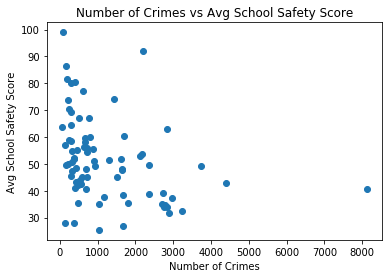

In [123]:
x = chicago_community_df["Total_Crimes_In_Community_Area"]
y = chicago_community_df["Avg_School_Safety_Score"]

plt.title('Number of Crimes vs Avg School Safety Score')
plt.xlabel('Number of Crimes')
plt.ylabel('Avg School Safety Score')

plt.scatter(x, y)
plt.show()

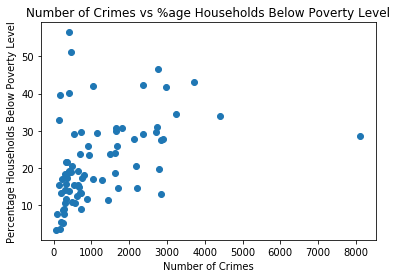

In [122]:
x = chicago_community_df["Total_Crimes_In_Community_Area"]
y = chicago_community_df["Percent_Household_Below_Poverty"]

plt.title('Number of Crimes vs %age Households Below Poverty Level')
plt.xlabel('Number of Crimes')
plt.ylabel('Percentage Households Below Poverty Level')

plt.scatter(x, y)
plt.show()

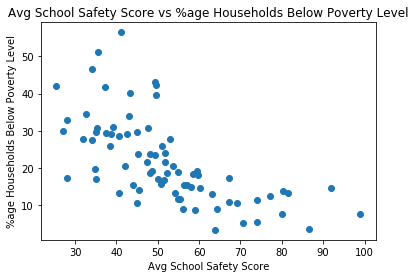

In [121]:
x = chicago_community_df["Avg_School_Safety_Score"]
y = chicago_community_df["Percent_Household_Below_Poverty"]

plt.title('Avg School Safety Score vs %age Households Below Poverty Level')
plt.xlabel('Avg School Safety Score')
plt.ylabel('%age Households Below Poverty Level')

plt.scatter(x, y)
plt.show()

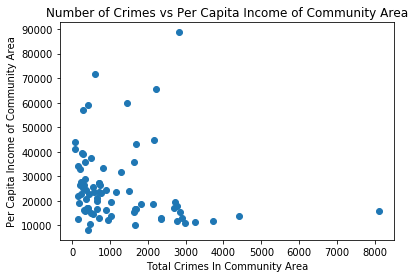

In [125]:
x = chicago_community_df["Total_Crimes_In_Community_Area"]
y = chicago_community_df["Per_Capita_Income"]

plt.title('Number of Crimes vs Per Capita Income of Community Area')
plt.xlabel('Total Crimes In Community Area')
plt.ylabel('Per Capita Income of Community Area')

plt.scatter(x, y)
plt.show()

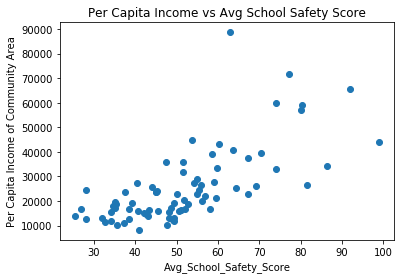

In [126]:
x = chicago_community_df["Avg_School_Safety_Score"]
y = chicago_community_df["Per_Capita_Income"]

plt.title('Per Capita Income vs Avg School Safety Score')
plt.xlabel('Avg_School_Safety_Score')
plt.ylabel('Per Capita Income of Community Area')

plt.scatter(x, y)
plt.show()

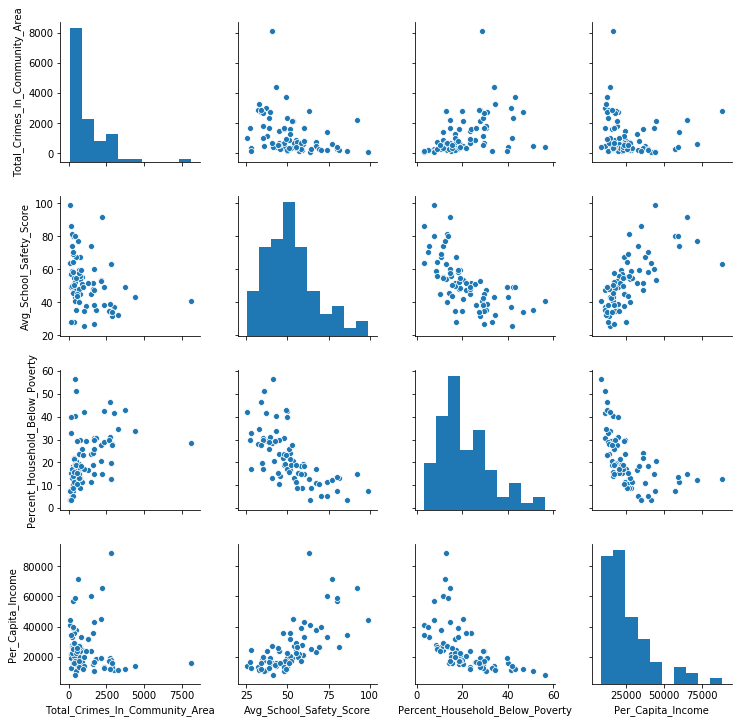

In [119]:
sns.pairplot(chicago_community_df)
plt.show()

In [127]:
chicago_community_df_corr = chicago_community_df.corr()
chicago_community_df_corr

,Total_Crimes_In_Community_Area,Avg_School_Safety_Score,Percent_Household_Below_Poverty,Per_Capita_Income
Total_Crimes_In_Community_Area,1.000000,-0.334920,0.400234,-0.142551
Avg_School_Safety_Score,-0.334920,1.000000,-0.649991,0.689154
Percent_Household_Below_Poverty,0.400234,-0.649991,1.000000,-0.566851
Per_Capita_Income,-0.142551,0.689154,-0.566851,1.000000


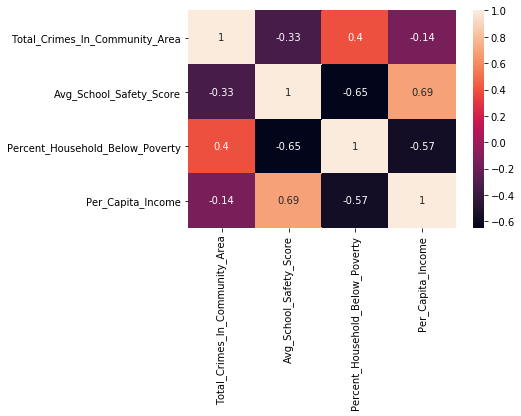

In [129]:
sns.heatmap(chicago_community_df_corr, annot=True)

## Inferences: 

1. 'Number of Crimes' has Negetive & Weak (0.33) Correlation with 'Average School Safety Score' of a Community Arrea
2. 'Number of Crimes' has Positive & Medium (0.40) Correlation with 'Percent Household below poverty' of a Community Arrea
3. 'Average School Safety Score' has positive (0.69) correlation with 'Per Capita Income' of a Community Arrea
4. 'Average School Safety Score' has negetive (0.65) correlation with 'Percent Household below poverty' of a Community Arrea

## Project SECTION:  D

### Explore: Visualize and identify the safest Community considering the Inferences.

Find out Communities with Lowest Crime. Sort Total_Crimes_In_Community_Area crimes in ascending order

In [131]:
chicago_community_df.sort_values(['Total_Crimes_In_Community_Area'], ascending = True, axis = 0, inplace = True )

chicago_community_df.head(10)

,Community_Area_Name,Total_Crimes_In_Community_Area,Avg_School_Safety_Score,Percent_Household_Below_Poverty,Per_Capita_Income
8,Edison Park,64,63.752437,3.3,40959
11,Forest Glen,79,99.000000,7.5,44164
17,Montclare,143,57.000000,15.3,22014
46,Burnside,147,28.000000,33.0,12515
73,Mount Greenwood,160,86.500000,3.4,34381
35,Oakland,165,49.504873,39.7,19252
12,North Park,200,81.600000,13.2,26576
9,Norwood Park,202,73.938109,5.4,32875
54,Hegewisch,218,50.000000,17.1,22677
10,Jefferson Park,241,59.000000,8.6,27751


Find out Communities with Lowest Percent_Household_Below_Poverty

In [133]:
chicago_community_df.sort_values(['Percent_Household_Below_Poverty'], ascending = True, axis = 0, inplace = True )

chicago_community_df.head(10) 

,Community_Area_Name,Total_Crimes_In_Community_Area,Avg_School_Safety_Score,Percent_Household_Below_Poverty,Per_Capita_Income
8,Edison Park,64,63.752437,3.3,40959
73,Mount Greenwood,160,86.500000,3.4,34381
71,Beverly,247,70.500000,5.1,39523
9,Norwood Park,202,73.938109,5.4,32875
4,North Center,286,80.072125,7.5,57123
11,Forest Glen,79,99.000000,7.5,44164
10,Jefferson Park,241,59.000000,8.6,27751
55,Garfield Ridge,723,56.000000,8.8,26353
63,Clearing,287,64.376218,8.9,25113
69,Ashburn,573,45.000000,10.4,23482


Find out Communities with Highest Avg_School_Safety_Score.

In [134]:
chicago_community_df.sort_values(['Avg_School_Safety_Score'], ascending = False, axis = 0, inplace = True )

chicago_community_df.head(10)

,Community_Area_Name,Total_Crimes_In_Community_Area,Avg_School_Safety_Score,Percent_Household_Below_Poverty,Per_Capita_Income
11,Forest Glen,79,99.000000,7.5,44164
31,(The) Loop[11],2212,92.000000,14.7,65526
73,Mount Greenwood,160,86.500000,3.4,34381
12,North Park,200,81.600000,13.2,26576
32,Near South Side,407,80.333333,13.8,59077
4,North Center,286,80.072125,7.5,57123
6,Lincoln Park,610,77.214982,12.3,71551
5,Lake View,1443,74.090909,11.4,60058
9,Norwood Park,202,73.938109,5.4,32875
71,Beverly,247,70.500000,5.1,39523


### Inference: The best Communty Areasm based on:- 
- Low Crime rate 
- Low % Household below poverty 
- High School Safety Score

### Community Area : Forest Glen 

## Project SECTION:  E

#### Modelling

- Step 1: Use GeoCoder to prepare a dataframe of Community Areas and Geolocation (Lattitude & Longitude)
- Step 2: Semd API calls to fouusquare.com to get Neighbourhood data for each Community Area
- Step 3: Use K-means Clustering to prepare location segments as per similarities of Neighbourhood Venues

Step 1: Use GeoCoder to prepare a dataframe of Community Areas and Geolocation (Lattitude & Longitude)

In [135]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [136]:
!pip install geopy
import geopy

In [137]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder

Solving environment: ...working... done

# All requested packages already installed.



In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

In [138]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


Prepare a DataFrame of Community Area, Location_Latitude and Location_Longitude

In [227]:
chicago_df = chicago_community_df 
chicago_df = chicago_df.reset_index(drop=True)

# Add two Columns: location_lat, location_long to chicago_df
chicago_df["location_lat"] = 0.00
chicago_df["location_long"] = 0.00

# Retain only Community_Area_Name, location_lat, location_long 
chicago_df = chicago_df[["Community_Area_Name", "location_lat", "location_long"]]
chicago_df = chicago_df.rename(columns={'Community_Area_Name' : 'Neighborhood'})

chicago_df = chicago_df.reset_index(drop=True)

print("chicago_df info : " , chicago_df.info())
print()
chicago_df.head(77)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Neighborhood   77 non-null     object 
 1   location_lat   77 non-null     float64
 2   location_long  77 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB
chicago_df info :  None



,Neighborhood,location_lat,location_long
0,Forest Glen,0.0,0.0
1,(The) Loop[11],0.0,0.0
2,Mount Greenwood,0.0,0.0
3,North Park,0.0,0.0
4,Near South Side,0.0,0.0
5,North Center,0.0,0.0
6,Lincoln Park,0.0,0.0
7,Lake View,0.0,0.0
8,Norwood Park,0.0,0.0
9,Beverly,0.0,0.0


In [229]:
chicago_df.iloc[1,0] = "The Loop"
chicago_df.head()

,Neighborhood,location_lat,location_long
0,Forest Glen,0.0,0.0
1,The Loop,0.0,0.0
2,Mount Greenwood,0.0,0.0
3,North Park,0.0,0.0
4,Near South Side,0.0,0.0


In [230]:
chicago_df.tail()

,Neighborhood,location_lat,location_long
72,Chicago Lawn,0.0,0.0
73,Avalon Park,0.0,0.0
74,Burnside,0.0,0.0
75,South Chicago,0.0,0.0
76,Washington Park,0.0,0.0


For getting correct Geolocation, each of the Neighborhoods names should have ,Chicago attached

In [231]:
# For Loop to modify the entire Neighbourhood column

last_row_index = chicago_df.tail(1).index[-1] 
print("last_row of chicago_df is ", last_row_index)

ca = 0
for ca in range(0, last_row_index+1):
    NeighName = chicago_df.iloc[ca,0]
    NeighName = NeighName+', Chicago'
    chicago_df.iloc[ca,0] = NeighName

chicago_df.head()

last_row of chicago_df is  76


,Neighborhood,location_lat,location_long
0,"Forest Glen, Chicago",0.0,0.0
1,"The Loop, Chicago",0.0,0.0
2,"Mount Greenwood, Chicago",0.0,0.0
3,"North Park, Chicago",0.0,0.0
4,"Near South Side, Chicago",0.0,0.0


In [232]:
chicago_df.tail()

,Neighborhood,location_lat,location_long
72,"Chicago Lawn, Chicago",0.0,0.0
73,"Avalon Park, Chicago",0.0,0.0
74,"Burnside, Chicago",0.0,0.0
75,"South Chicago, Chicago",0.0,0.0
76,"Washington Park, Chicago",0.0,0.0


The name_chicago_df DataFrame is ready with Full Neighborhood name for running running GeLocation process  

In [233]:
# Run a For loop to get the geographical coordinates of name_chicago_df

last_row_index = chicago_df.tail(1).index[-1] 
print("last_row of chicago_df is ", last_row_index)

ca = 0
for ca in range(0, last_row_index+1):
    la = 0
    lo = 0
    
    location_name = chicago_df.iloc[ca,0]
    
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(location_name)
    latitude = location.latitude
    longitude = location.longitude
    
    chicago_df.iloc[ca,1] = latitude
    chicago_df.iloc[ca,2] = longitude


last_row of chicago_df is  76


In [234]:
print(location_name, latitude, longitude)

Washington Park, Chicago 41.7925338 -87.6181052


In [236]:
chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Neighborhood   77 non-null     object 
 1   location_lat   77 non-null     float64
 2   location_long  77 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


In [237]:
chicago_df.head()

,Neighborhood,location_lat,location_long
0,"Forest Glen, Chicago",41.991752,-87.751674
1,"The Loop, Chicago",41.875562,-87.624421
2,"Mount Greenwood, Chicago",41.698089,-87.708662
3,"North Park, Chicago",41.980587,-87.720892
4,"Near South Side, Chicago",41.856700,-87.624774


In [238]:
chicago_df.tail()

,Neighborhood,location_lat,location_long
72,"Chicago Lawn, Chicago",41.775033,-87.696441
73,"Avalon Park, Chicago",41.745035,-87.588658
74,"Burnside, Chicago",41.730035,-87.596714
75,"South Chicago, Chicago",41.734587,-87.551322
76,"Washington Park, Chicago",41.792534,-87.618105


#### Now, that we have received thge CeoLocations, we need to clean up the Neighborhood Column

In [239]:
# For Loop to get the Neighbourhood column without ,Chicago mentioned

last_row_index = chicago_df.tail(1).index[-1] 
print("last_row of chicago_df is ", last_row_index)

ca = 0
for ca in range(0, last_row_index+1):
    NeighName = chicago_df.iloc[ca,0]
    x = lambda strList : strList[0]
    strName = NeighName
    NeighName = x(strName.split(","))
    chicago_df.iloc[ca,0] = NeighName

chicago_df.head()

last_row of chicago_df is  76


,Neighborhood,location_lat,location_long
0,Forest Glen,41.991752,-87.751674
1,The Loop,41.875562,-87.624421
2,Mount Greenwood,41.698089,-87.708662
3,North Park,41.980587,-87.720892
4,Near South Side,41.856700,-87.624774


In [240]:
chicago_df.tail()

,Neighborhood,location_lat,location_long
72,Chicago Lawn,41.775033,-87.696441
73,Avalon Park,41.745035,-87.588658
74,Burnside,41.730035,-87.596714
75,South Chicago,41.734587,-87.551322
76,Washington Park,41.792534,-87.618105


In [241]:
chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Neighborhood   77 non-null     object 
 1   location_lat   77 non-null     float64
 2   location_long  77 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


### Our chicago_df is ready with Correct Community (Neighborhood)  names, and GeoLocations

### We will now use FourSquare to get Neighbourhood Venue Details of chicago_df

In [242]:
CLIENT_ID='BARXVV15ELHMIXL2QBPIZFP5LFCMLKWXRG0HO5H30S0I4PXY'
CLIENT_SECRET='GNTWAQ3AFRVRDGJWK2XV32K2IZEJ1JEKOTZHGMLQZPAXIPLA'

VERSION='20180604'
LIMIT=30

print("Monishankar's credentials:")
print('CLIENT_ID:' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Monishankar's credentials:
CLIENT_ID:BARXVV15ELHMIXL2QBPIZFP5LFCMLKWXRG0HO5H30S0I4PXY
CLIENT_SECRET:GNTWAQ3AFRVRDGJWK2XV32K2IZEJ1JEKOTZHGMLQZPAXIPLA


In [243]:
# get the top 100 venues that are in the last Community of select37_communities_df within a radius of 500 meters
ca = 0
latitude = chicago_df.iloc[ca,1]
longitude = chicago_df.iloc[ca,2]

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

print(chicago_df.iloc[ca,0], latitude, longitude)
print('URL : ', url) 

Forest Glen 41.991751550000004 -87.75167396842738
URL :  https://api.foursquare.com/v2/venues/explore?&client_id=BARXVV15ELHMIXL2QBPIZFP5LFCMLKWXRG0HO5H30S0I4PXY&client_secret=GNTWAQ3AFRVRDGJWK2XV32K2IZEJ1JEKOTZHGMLQZPAXIPLA&v=20180604&ll=41.991751550000004,-87.75167396842738&radius=500&limit=100


In [244]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
# results

In [245]:
# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [246]:
# Clean the json and structure it into a *pandas* dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Whole Foods Market,Grocery Store,41.990698,-87.748622
1,Himshikhar Restaurant,Indian Restaurant,41.990862,-87.748152
2,Eden's,Fast Food Restaurant,41.991249,-87.748101
3,Billy Caldwell Golf Course,Golf Course,41.992251,-87.757000
4,Starbucks,Coffee Shop,41.994297,-87.748584
5,55 South,Moving Target,41.992947,-87.754121
6,Chai's Asian Bistro,Asian Restaurant,41.989929,-87.747964
7,Tarpey's Pharmacy,Pharmacy,41.990164,-87.747619


In [247]:
nearby_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        8 non-null      object 
 1   categories  8 non-null      object 
 2   lat         8 non-null      float64
 3   lng         8 non-null      float64
dtypes: float64(2), object(2)
memory usage: 384.0+ bytes


Create a function to repeat the same process to all the Communities for chicago_df

In [248]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [250]:
# run the above function on each neighborhood and create a new dataframe called community_name_venues.

community_name_venues = getNearbyVenues(names=chicago_df['Neighborhood'],
                                        latitudes=chicago_df['location_lat'], 
                                        longitudes=chicago_df['location_long'] 
                                        )


Forest Glen
The Loop
Mount Greenwood
North Park
Near South Side
North Center
Lincoln Park
Lake View
Norwood Park
Beverly
Dunning
West Ridge
Lincoln Square
Clearing
Edison Park
Near North Side
West Town
Edgewater
Albany Park
Jefferson Park
Hyde Park
West Lawn
Montclare
Avondale
Garfield Ridge
Portage Park
Bridgeport
Calumet Heights
Irving Park
Near West Side
Chatham
McKinley Park
Pullman
Uptown
Logan Square
Lower West Side
West Elsdon
Hegewisch
Oakland
East Garfield Park
North Lawndale
Gage Park
East Side
Belmont Cragin
Brighton Park
South Lawndale
Kenwood
Archer Heights
Rogers Park
Ashburn
Douglas
O'Hare
Armour Square
Humboldt Park
South Deering
Hermosa
Riverdale
Austin
Morgan Park
South Shore
New City
West Pullman
Grand Boulevard
West Garfield Park
Fuller Park
Woodlawn
Greater Grand Crossing
Washington Heights
Roseland
Englewood
Auburn Gresham
West Englewood
Chicago Lawn
Avalon Park
Burnside
South Chicago
Washington Park


In [252]:
print(community_name_venues.info())
community_name_venues.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            1467 non-null   object 
 1   Neighborhood Latitude   1467 non-null   float64
 2   Neighborhood Longitude  1467 non-null   float64
 3   Venue                   1467 non-null   object 
 4   Venue Latitude          1467 non-null   float64
 5   Venue Longitude         1467 non-null   float64
 6   Venue Category          1467 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.4+ KB
None


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Forest Glen,41.991752,-87.751674,Whole Foods Market,41.990698,-87.748622,Grocery Store
1,Forest Glen,41.991752,-87.751674,Himshikhar Restaurant,41.990862,-87.748152,Indian Restaurant
2,Forest Glen,41.991752,-87.751674,Eden's,41.991249,-87.748101,Fast Food Restaurant
3,Forest Glen,41.991752,-87.751674,Billy Caldwell Golf Course,41.992251,-87.757000,Golf Course
4,Forest Glen,41.991752,-87.751674,Starbucks,41.994297,-87.748584,Coffee Shop


In [253]:
# no of venues that were returned for each neighborhood
community_name_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albany Park,16,16,16,16,16,16
Archer Heights,16,16,16,16,16,16
Armour Square,11,11,11,11,11,11
Ashburn,4,4,4,4,4,4
Auburn Gresham,5,5,5,5,5,5
Austin,12,12,12,12,12,12
Avalon Park,15,15,15,15,15,15
Avondale,27,27,27,27,27,27
Belmont Cragin,17,17,17,17,17,17


In [254]:
# unique categories can be curated from all the returned venues

print('There are {} uniques categories.'.format(len(community_name_venues['Venue Category'].unique())))

There are 242 uniques categories.


### Analyze Each Neighborhood

In [255]:
# one hot encoding
community_name_venues_onehot = pd.get_dummies(community_name_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
community_name_venues_onehot['Neighborhood'] = community_name_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [community_name_venues_onehot.columns[-1]] + list(community_name_venues_onehot.columns[:-1])
community_name_venues_onehot = community_name_venues_onehot[fixed_columns]

community_name_venues_onehot.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Carpet Store,Check Cashing Service,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Cafeteria,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Light Rail Station,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Noodle House,Optical Shop,Organic Grocery,Other Repair Shop,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Record Shop,Rental Car Location,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Ukrainian Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Forest Glen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Forest Glen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [256]:
community_name_venues_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Columns: 243 entries, Neighborhood to Yoga Studio
dtypes: object(1), uint8(242)
memory usage: 358.3+ KB


In [257]:
community_name_venues_onehot.shape

(1467, 243)

In [258]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

community_name_venues_grouped = community_name_venues_onehot.groupby('Neighborhood').mean().reset_index()
community_name_venues_grouped.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Carpet Store,Check Cashing Service,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Cafeteria,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Light Rail Station,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Noodle House,Optical Shop,Organic Grocery,Other Repair Shop,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Record Shop,Rental Car Location,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Ukrainian Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Albany Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0625,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062500,0.0,0.0,0.0625,0.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.000000,0.0,0.0,0.0,0.0,0

In [259]:
community_name_venues_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Columns: 243 entries, Neighborhood to Yoga Studio
dtypes: float64(242), object(1)
memory usage: 142.5+ KB


In [260]:
community_name_venues_grouped["Neighborhood"].nunique()

75

In [261]:
# print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in community_name_venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = community_name_venues_grouped[community_name_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park----
                 venue  freq
0        Grocery Store  0.19
1          Bus Station  0.12
2    Mobile Phone Shop  0.06
3           Donut Shop  0.06
4  Fried Chicken Joint  0.06


----Archer Heights----
                venue  freq
0  Mexican Restaurant  0.25
1   Mobile Phone Shop  0.19
2       Grocery Store  0.12
3                Bank  0.06
4      Sandwich Place  0.06


----Armour Square----
                  venue  freq
0    Chinese Restaurant  0.27
1        Cosmetics Shop  0.09
2    Italian Restaurant  0.09
3  Fast Food Restaurant  0.09
4           Gas Station  0.09


----Ashburn----
                        venue  freq
0  Construction & Landscaping  0.25
1             Automotive Shop  0.25
2          Light Rail Station  0.25
3              Cosmetics Shop  0.25
4         Indie Movie Theater  0.00


----Auburn Gresham----
              venue  freq
0       Candy Store   0.2
1    Discount Store   0.2
2              Park   0.2
3              Pool   0.2
4  Basketball Court 

                  venue  freq
0  Gym / Fitness Center  0.08
1            Restaurant  0.08
2           Pizza Place  0.08
3                   Gym  0.08
4        Breakfast Spot  0.04


----Near South Side----
           venue  freq
0  Historic Site  0.06
1    Pizza Place  0.04
2            Bar  0.04
3           Bank  0.04
4  Grocery Store  0.04


----Near West Side----
                 venue  freq
0                  Bar  0.08
1           Donut Shop  0.08
2  Fried Chicken Joint  0.08
3           Sports Bar  0.08
4                Diner  0.04


----New City----
                 venue  freq
0  American Restaurant  0.13
1              Brewery  0.07
2          Pizza Place  0.07
3    Other Repair Shop  0.07
4        Grocery Store  0.07


----North Center----
         venue  freq
0          Bar  0.09
1  Coffee Shop  0.06
2     Boutique  0.05
3      Brewery  0.05
4   Restaurant  0.03


----North Lawndale----
                 venue  freq
0            BBQ Joint  0.33
1                 Food  0.33
2  

Putting that into a datashape

In [262]:
# function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [263]:
# new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = community_name_venues_grouped['Neighborhood']


neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Archer Heights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Armour Square,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ashburn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Auburn Gresham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
for ind in np.arange(community_name_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(community_name_venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted = neighborhoods_venues_sorted.reset_index(drop=True)
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Grocery Store,Bus Station,Korean Restaurant,Bakery,Latin American Restaurant,Donut Shop,Fried Chicken Joint,Sandwich Place,Chinese Restaurant,Hookah Bar
1,Archer Heights,Mexican Restaurant,Mobile Phone Shop,Grocery Store,Gas Station,Sandwich Place,Wings Joint,Bar,Coffee Shop,Big Box Store,Bank
2,Armour Square,Chinese Restaurant,Grocery Store,Italian Restaurant,Asian Restaurant,Sandwich Place,Gas Station,Fast Food Restaurant,Hot Dog Joint,Cosmetics Shop,Farmers Market
3,Ashburn,Construction & Landscaping,Automotive Shop,Cosmetics Shop,Light Rail Station,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm
4,Auburn Gresham,Pool,Park,Candy Store,Discount Store,Basketball Court,Farmers Market,Farm,Fabric Shop,Dry Cleaner,Eye Doctor


### Cluster Neighborhoods

In [265]:
# Run *k*-means to cluster the neighborhood into 5 clusters.

kclusters = 5

community_name_venues_grouped_clustering = community_name_venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(community_name_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([2, 0, 2, 2, 3, 3, 2, 2, 0, 2])

In [266]:
# new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [267]:
community_name_venues_merged = chicago_df


community_name_venues_merged = community_name_venues_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

community_name_venues_merged.head() 

,Neighborhood,location_lat,location_long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Forest Glen,41.991752,-87.751674,2.0,Asian Restaurant,Fast Food Restaurant,Pharmacy,Coffee Shop,Indian Restaurant,Moving Target,Golf Course,Grocery Store,Yoga Studio,Electronics Store
1,The Loop,41.875562,-87.624421,2.0,Coffee Shop,Pizza Place,Hotel,Sandwich Place,Pub,Boutique,Bookstore,Museum,Asian Restaurant,Hot Dog Joint
2,Mount Greenwood,41.698089,-87.708662,3.0,Home Service,Cosmetics Shop,Park,Vineyard,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Donut Shop,Fabric Shop
3,North Park,41.980587,-87.720892,2.0,Food Truck,Sandwich Place,College Bookstore,Coffee Shop,Gym Pool,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor
4,Near South Side,41.856700,-87.624774,2.0,Historic Site,Grocery Store,Park,Bank,Bar,Pizza Place,Gym,Seafood Restaurant,Cajun / Creole Restaurant,Café


In [268]:
community_name_venues_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            77 non-null     object 
 1   location_lat            77 non-null     float64
 2   location_long           77 non-null     float64
 3   Cluster Labels          75 non-null     float64
 4   1st Most Common Venue   75 non-null     object 
 5   2nd Most Common Venue   75 non-null     object 
 6   3rd Most Common Venue   75 non-null     object 
 7   4th Most Common Venue   75 non-null     object 
 8   5th Most Common Venue   75 non-null     object 
 9   6th Most Common Venue   75 non-null     object 
 10  7th Most Common Venue   75 non-null     object 
 11  8th Most Common Venue   75 non-null     object 
 12  9th Most Common Venue   75 non-null     object 
 13  10th Most Common Venue  75 non-null     object 
dtypes: float64(3), object(11)
memory usage: 8.5+

It seems, two of the Neighborhoods (Community Aneas) could not get Veneue Details from FourSquare

Need to delete those Neighborhoods (Community Aneas) from the Clustering

In [269]:
community_name_venues_merged = community_name_venues_merged.reset_index(drop=True)
check_null_missing(community_name_venues_merged)

There are null values
No of Zeros in attribute Cluster Labels is: 9
No of null in attribute Cluster Labels is: 2
No of null in attribute 1st Most Common Venue is: 2
No of null in attribute 2nd Most Common Venue is: 2
No of null in attribute 3rd Most Common Venue is: 2
No of null in attribute 4th Most Common Venue is: 2
No of null in attribute 5th Most Common Venue is: 2
No of null in attribute 6th Most Common Venue is: 2
No of null in attribute 7th Most Common Venue is: 2
No of null in attribute 8th Most Common Venue is: 2
No of null in attribute 9th Most Common Venue is: 2
No of null in attribute 10th Most Common Venue is: 2


In [270]:
community_name_venues_merged.dropna(inplace=True)
check_null_missing(community_name_venues_merged)

No Null Values
No of Zeros in attribute Cluster Labels is: 9


In [271]:
community_name_venues_merged = community_name_venues_merged.rename(columns={'Cluster Labels' : 'Cluster_Labels'})
community_name_venues_merged["Cluster_Labels"] = community_name_venues_merged.Cluster_Labels.astype(np.int64)

community_name_venues_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 76
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            75 non-null     object 
 1   location_lat            75 non-null     float64
 2   location_long           75 non-null     float64
 3   Cluster_Labels          75 non-null     int64  
 4   1st Most Common Venue   75 non-null     object 
 5   2nd Most Common Venue   75 non-null     object 
 6   3rd Most Common Venue   75 non-null     object 
 7   4th Most Common Venue   75 non-null     object 
 8   5th Most Common Venue   75 non-null     object 
 9   6th Most Common Venue   75 non-null     object 
 10  7th Most Common Venue   75 non-null     object 
 11  8th Most Common Venue   75 non-null     object 
 12  9th Most Common Venue   75 non-null     object 
 13  10th Most Common Venue  75 non-null     object 
dtypes: float64(2), int64(1), object(11)
memory u

In [281]:
community_name_venues_merged.head(75)

,Neighborhood,location_lat,location_long,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Forest Glen,41.991752,-87.751674,2,Asian Restaurant,Fast Food Restaurant,Pharmacy,Coffee Shop,Indian Restaurant,Moving Target,Golf Course,Grocery Store,Yoga Studio,Electronics Store
1,The Loop,41.875562,-87.624421,2,Coffee Shop,Pizza Place,Hotel,Sandwich Place,Pub,Boutique,Bookstore,Museum,Asian Restaurant,Hot Dog Joint
2,Mount Greenwood,41.698089,-87.708662,3,Home Service,Cosmetics Shop,Park,Vineyard,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Donut Shop,Fabric Shop
3,North Park,41.980587,-87.720892,2,Food Truck,Sandwich Place,College Bookstore,Coffee Shop,Gym Pool,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor
4,Near South Side,41.856700,-87.624774,2,Historic Site,Grocery Store,Park,Bank,Bar,Pizza Place,Gym,Seafood Restaurant,Cajun / Creole Restaurant,Café
5,North Center,41.956107,-87.679160,2,Bar,Coffee Shop,Boutique,Brewery,Video Store,Mobile Phone Shop,Restaurant,Dive Bar,Bank,Salon / Barbershop
6,Lincoln Park,41.940298,-87.638117,3,Boat or Ferry,Harbor / Marina,Dog Run,Park,Juice Bar,Bike Rental / Bike Share,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Electronics Store
7,Lake View,41.947050,-87.655429,2,Sports Bar,Bar,Pizza Place,General Entertainment,Baseball Stadium,Sandwich Place,Thai Restaurant,BBQ Joint,Dive Bar,Taco Place
8,Norwood Park,41.985590,-87.800582,3,Pool,History Museum,Park,Yoga Studio,Eye Doctor,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Exhibit,Farm
9,Beverly,41.718153,-87.671767,2,Bakery,Cosmetics Shop,Park,Burger Joint,Italian Restaurant,Grocery Store,Boutique,Dessert Shop,Ethiopian Restaurant,Fish Market


In [273]:
# visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(community_name_venues_merged['location_lat'], community_name_venues_merged['location_long'], community_name_venues_merged['Neighborhood'], community_name_venues_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

#### Cluster 1

In [274]:
community_name_venues_merged.loc[community_name_venues_merged['Cluster_Labels'] == 0, community_name_venues_merged.columns[[1] + list(range(5, community_name_venues_merged.shape[1]))]]

,location_lat,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,41.772811,Bakery,Discount Store,History Museum,Pizza Place,Bowling Alley,Fast Food Restaurant,Seafood Restaurant,Diner,Sandwich Place
35,41.854200,Thrift / Vintage Store,Pizza Place,Bakery,Breakfast Spot,Brewery,Flower Shop,Bike Shop,Donut Shop,Supermarket
36,41.793922,Bar,Ice Cream Shop,Gas Station,Donut Shop,Fried Chicken Joint,Grocery Store,Video Store,Supermarket,Gym / Fitness Center
41,41.795033,Sandwich Place,Currency Exchange,Asian Restaurant,Bakery,Yoga Studio,Ethiopian Restaurant,Exhibit,Eye Doctor,Fabric Shop
43,41.931698,Grocery Store,Nightclub,Department Store,Gas Station,Bakery,Discount Store,Chinese Restaurant,Burger Joint,Restaurant
45,41.843644,Supermarket,Grocery Store,Bakery,Dessert Shop,Mobile Phone Shop,Park,Ice Cream Shop,Liquor Store,Restaurant
47,41.811422,Mobile Phone Shop,Grocery Store,Gas Station,Sandwich Place,Wings Joint,Bar,Coffee Shop,Big Box Store,Bank
55,41.928643,Supermarket,Discount Store,Construction & Landscaping,Latin American Restaurant,Optical Shop,Park,Seafood Restaurant,Check Cashing Service,Diner
75,41.734587,Train Station,Italian Restaurant,Discount Store,Park,Convenience Store,Shoe Store,Fast Food Restaurant,Farmers Market,Farm


#### Cluster 2

In [275]:
community_name_venues_merged.loc[community_name_venues_merged['Cluster_Labels'] == 1, community_name_venues_merged.columns[[1] + list(range(5, community_name_venues_merged.shape[1]))]]

,location_lat,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,42.003548,Home Service,Convenience Store,Wine Bar,Fried Chicken Joint,Fabric Shop,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor
74,41.730035,Intersection,Bus Station,Train Station,Cuban Restaurant,Currency Exchange,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant


#### Cluster 3

In [276]:
community_name_venues_merged.loc[community_name_venues_merged['Cluster_Labels'] == 2, community_name_venues_merged.columns[[1] + list(range(5, community_name_venues_merged.shape[1]))]]

,location_lat,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,41.991752,Fast Food Restaurant,Pharmacy,Coffee Shop,Indian Restaurant,Moving Target,Golf Course,Grocery Store,Yoga Studio,Electronics Store
1,41.875562,Pizza Place,Hotel,Sandwich Place,Pub,Boutique,Bookstore,Museum,Asian Restaurant,Hot Dog Joint
3,41.980587,Sandwich Place,College Bookstore,Coffee Shop,Gym Pool,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor
4,41.856700,Grocery Store,Park,Bank,Bar,Pizza Place,Gym,Seafood Restaurant,Cajun / Creole Restaurant,Café
5,41.956107,Coffee Shop,Boutique,Brewery,Video Store,Mobile Phone Shop,Restaurant,Dive Bar,Bank,Salon / Barbershop
7,41.947050,Bar,Pizza Place,General Entertainment,Baseball Stadium,Sandwich Place,Thai Restaurant,BBQ Joint,Dive Bar,Taco Place
9,41.718153,Cosmetics Shop,Park,Burger Joint,Italian Restaurant,Grocery Store,Boutique,Dessert Shop,Ethiopian Restaurant,Fish Market
12,41.975990,Bar,Cosmetics Shop,Liquor Store,Pizza Place,Café,Korean Restaurant,Karaoke Bar,Mexican Restaurant,Rental Car Location
13,41.780588,Restaurant,Pizza Place,Convenience Store,Chinese Restaurant,Fried Chicken Joint,Grocery Store,Playground,Hot Dog Joint,Record Shop
14,42.005733,Bar,Mexican Restaurant,American Restaurant,Theater,Bakery,Train Station,Breakfast Spot,Spa,Liquor Store


#### Cluster 4

In [277]:
community_name_venues_merged.loc[community_name_venues_merged['Cluster_Labels'] == 3, community_name_venues_merged.columns[[1] + list(range(5, community_name_venues_merged.shape[1]))]]

,location_lat,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,41.698089,Cosmetics Shop,Park,Vineyard,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Donut Shop,Fabric Shop
6,41.940298,Harbor / Marina,Dog Run,Park,Juice Bar,Bike Rental / Bike Share,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Electronics Store
8,41.985590,History Museum,Park,Yoga Studio,Eye Doctor,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Exhibit,Farm
10,41.952809,Intersection,Park,Deli / Bodega,Yoga Studio,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor,Fabric Shop
24,41.803617,Sandwich Place,Mexican Restaurant,Paper / Office Supplies Store,Park,Gas Station,Yoga Studio,Eastern European Restaurant,Electronics Store,Exhibit
27,41.730035,Pharmacy,Deli / Bodega,Park,Gym / Fitness Center,Fabric Shop,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor
30,41.741145,Park,Donut Shop,Ice Cream Shop,Fast Food Restaurant,Eastern European Restaurant,Fish Market,Fish & Chips Shop,Filipino Restaurant,Farmers Market
32,41.692218,Train Station,Food Court,National Park,Museum,Café,Gas Station,Marijuana Dispensary,Food,Fabric Shop
38,41.823653,Public Art,Discount Store,Lake,Track,Boutique,Fast Food Restaurant,Farmers Market,Farm,Eastern European Restaurant
53,41.905767,Museum,Garden,Baseball Field,Lake,Food Truck,Soccer Field,Café,Exhibit,Ethiopian Restaurant


#### Cluster 5

In [278]:
community_name_venues_merged.loc[community_name_venues_merged['Cluster_Labels'] == 4, community_name_venues_merged.columns[[1] + list(range(5, community_name_venues_merged.shape[1]))]]

,location_lat,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,41.701979,Intersection,Yoga Studio,Dry Cleaner,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm


### Clusters:

#### We have Five Clusters, with segmented Communities
- Cluster 1: 09 communities
- Cluster 2: 03 communities
- Cluster 3: 47 communities
- Cluster 4: 16 communities
- Cluster 5: 01 community

### Result and Conclusion

The objective of this project is to help any fanmily (with a school going kid) who would like to relocate to Chicago. The project will help to find out low crime & safe Cluster Areas, and also surrounding amenities and venues.


The Cluster 3 which has highest nukmber of Community Areas, has the most appropriate Community Area (Forest Glen), in terms of (a) low crime, (b) good school safety score and (c) low Percentage of Household Below Poverty Level